# X-ray emission: outlier removal and concentration correction

The notebook shows the processing steps for an X-ray emission measurement, including concentration correction, and outliers removal.

In [15]:
import logging
import sys

import matplotlib.pyplot as plt

from daxs.measurements import Xes
from daxs.sources import Hdf5Source
from daxs.utils import resources

Set up logging to get console messages during the processing steps.

In [17]:
logging.basicConfig(level=logging.INFO, stream=sys.stdout)
logging.getLogger("daxs").setLevel(logging.DEBUG)

Ptart by defining a source of scans, here a HDF5 file, `P_XES.h5`. The file is stored in the `daxs-data` project and is automatically downloaded. Specify the name of the file, the included scans, and the the location of the x, signal, and monitor data in the tree like structure of the HDF5 file. 

In [18]:
data_mappings = {
    "x": ".1/measurement/xes_en_texs",
    "signal": [
        ".1/measurement/g02",
        ".1/measurement/g03",
        ".1/measurement/g04",
        ".1/measurement/g05",
        ".1/measurement/g06",
        ".1/measurement/g07",
        ".1/measurement/g09",
        ".1/measurement/g10",
        ".1/measurement/g11",
        ".1/measurement/g12",
        ".1/measurement/g13",
        ".1/measurement/g14",
    ],
    "monitor": ".1/measurement/I0t",
}

hdf5_filename = resources.getfile("P_XES.h5")
source = Hdf5Source(hdf5_filename, included_scans=134, data_mappings=data_mappings)

INFO:silx.utils.ExternalResources:Image P_XES.h5 successfully downloaded.


Create the measurement using the defined source of scans. Apply the concentration correction using data from scan 135.

In [19]:
measurement = Xes(source)
measurement.concentration_correction(135)

DEBUG:daxs.sources:The scans [134] have been selected from /var/folders/w0/jc89ktrd7yv98x7f4643l8gw0000gn/T/daxs_testdata_marius/P_XES.h5.


Find the outliers in the signal. The outliers are detected by looking at the neighbouring data from each counter. Plot the scans data to see how the parameters of the `find_outliers` function influence the detection.

DEBUG:daxs.filters:Hampel filter window size = 25.


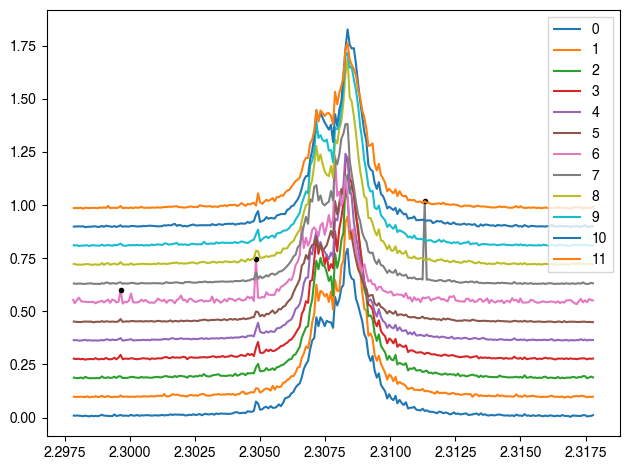

In [20]:
measurement.find_outliers(threshold=9)
for scan in measurement.scans:
    fig, ax = plt.subplots()
    scan.plot(ax=ax)
plt.tight_layout()

Remove the outliers and plot the before and after signal.

DEBUG:daxs.scans:The new X-axis values are the same as the current ones.
INFO:daxs.measurements:The scans data was aggregated using the fraction of sums mode.
INFO:daxs.measurements:Removing outliers.
INFO:daxs.measurements:The scans data was aggregated using the fraction of sums mode.


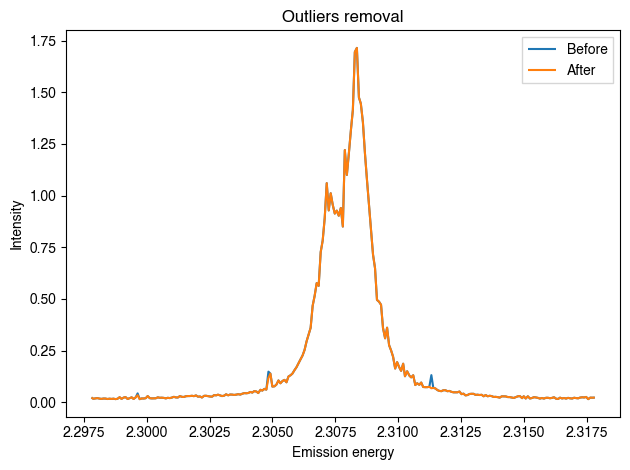

In [21]:
fig, ax = plt.subplots()

ax.plot(measurement.x, measurement.signal, label="Before")
measurement.remove_outliers()
ax.plot(measurement.x, measurement.signal, label="After")

ax.set_xlabel("Emission energy")
ax.set_ylabel("Intensity")
ax.legend(fancybox=False)
ax.set_title("Outliers removal")

plt.tight_layout()